In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import fs
from itertools import product

In [2]:
# Reading data
data_dir = fs.open_fs('.')
data = data_dir.open('data.csv')
data = pd.read_csv(data.buffer)

In [3]:
# Ordering data
filt                        = data.iloc[:,0] > data.iloc[:,1]
buff                        = data.loc[filt, 'Est']
data.loc[filt, 'Est']       = data.loc[filt, 'PV']
data.loc[filt, 'PV']        = buff
data['Lado'] = data.iloc[:,0] + data.iloc[:,1]
vertex = sorted(list(set(np.concatenate((data.iloc[:,0].unique(), data.iloc[:,1].unique())))))

In [4]:
# Vertex
sorted(vertex)

['A', 'B', 'C', 'D']

In [5]:
data

,Est,PV,Tipo,Longitud,Lado
0,A,B,L,15.002,AB
1,A,B,L,15.002,AB
2,A,B,L,15.000,AB
3,A,B,L,15.004,AB
4,B,C,L,15.524,BC
5,B,C,L,15.522,BC
6,B,C,L,15.521,BC
7,B,C,L,15.525,BC
8,C,D,L,14.901,CD
9,C,D,L,14.903,CD


In [6]:
# means
data_mean = data.groupby(['Est', 'PV', 'Tipo',]).agg({'Longitud': np.mean})
data_mean = data_mean.reset_index()

In [7]:
data_mean[data_mean['Tipo'] == 'L']

,Est,PV,Tipo,Longitud
0,A,B,L,15.002
2,A,D,L,14.892
3,B,C,L,15.523
5,C,D,L,14.902


In [8]:
# class medicion(weight: float, length: float, e: float, coefd: float):
    
    # pass

In [9]:
# find angles function
def find_angles(data, vertex):
    vertex_angles = {}
    sides = data_mean.loc[data_mean.iloc[:,2]=='L']
    diagonals = data_mean.loc[data_mean.iloc[:,2]=='D']
    sides['side'] = sides.iloc[:,0] + sides.iloc[:,1]
    for i in vertex:
        sides_i = sides[(sides.iloc[:,0]==i) | (sides.iloc[:,1]==i)]
        sbs_i = sides_i['side'].str.replace(i,'').values
        sides_i = sides_i.iloc[:,3].values
        diagonal_i = diagonals[((diagonals.iloc[:,0] == sbs_i[0])) & (diagonals.iloc[:,1] == sbs_i[1]) | ((diagonals.iloc[:,0] == sbs_i[1]) & (diagonals.iloc[:,1] == sbs_i[0]))]
        diagonal_i = diagonal_i.iloc[:,3].values
        angle = float(np.arccos((sides_i[0]**2 + sides_i[1]**2 - diagonal_i**2)/(2*sides_i[0]*sides_i[1])))
        vertex_angles[i] = angle
    return vertex_angles

In [51]:
angles = find_angles(data_mean, vertex)
angle_correction = (2*np.pi - (np.sum(list(angles.values()))))/len(angles)
angles_corrected = {i: (v + angle_correction) for i, v in angles.items()}
angles_corrected

C:\Users\Cesar\AppData\Local\Temp\ipykernel_12252\969116817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sides['side'] = sides.iloc[:,0] + sides.iloc[:,1]


{'A': 1.329328213861972,
 'B': 1.7946420083249777,
 'C': 1.3015938254689292,
 'D': 1.857621259523708}

In [11]:
# No corregido
pd.DataFrame(angles.values(), index=angles.keys()).agg([
    lambda x: x,
    lambda x: x/np.pi * 180])

0            
   <lambda>    <lambda>
A  1.329187   76.156781
B  1.794500  102.817298
C  1.301452   74.567718
D  1.857480  106.425743

In [52]:
# Corregido
pd.DataFrame(angles_corrected.values(), index=angles_corrected.keys()).agg([
    lambda x: x,
    lambda x: x/np.pi * 180])

0            
   <lambda>    <lambda>
A  1.329328   76.164896
B  1.794642  102.825413
C  1.301594   74.575833
D  1.857621  106.433858

C:\Users\Cesar\anaconda3\envs\ds\lib\site-packages\matplotlib\quiver.py:647: RuntimeWarning: invalid value encountered in true_divide
  lengths = np.hypot(*dxy.T) / eps
C:\Users\Cesar\anaconda3\envs\ds\lib\site-packages\matplotlib\quiver.py:689: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Cesar\anaconda3\envs\ds\lib\site-packages\matplotlib\quiver.py:689: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


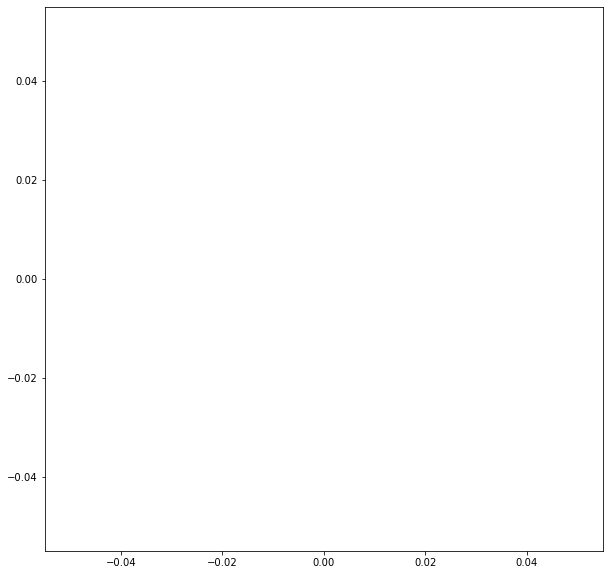

In [57]:
p_0 = [0,0,1,1]
p_1 = [0,0,-1,1]


fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(p_0[0], p_0[0],
          angles='xy')